In [77]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from model.Models import BorderPoint
from model.Models import Matrix
from model.Models import State
from model.Models import ListCross

In [78]:
# positions = [[50, 40], [580, 40], [580, 60], [430, 60], 
#                       [430, 100], [520, 100], [520, 150],[600, 150], [600, 200], [520, 200]
#                       , [520, 440], [650, 440], [650, 630],
#                       [210, 630], [210, 530], [70, 530], [70, 420],
#                         [150, 420], [150, 140], [50, 140], [50, 40]]
# # [ngang, dọc]
# # grid_size = (60, 100)
positions = [[50, 40], [580, 40], [580, 60], [430, 60], 
                      [430, 100], [520, 100], [520, 150],[600, 150], [600, 220], [620, 220],
                      [620, 180], [660, 180], [660, 280], 
                      [550,280], [550,220], [520, 220], 
                      [520, 440], [650, 440], [650, 630],
                      [210, 630], [210, 530], [70, 530], [70, 420], 
                      [150, 420], [150, 140], [50, 140], [50, 40]]
# positions = [[60, 60], [270, 60], [270, 270], [60, 270], [60, 60]]
grid_size = [150, 150]
# positions = [[50, 40], [150, 40], [150, 120], [350, 120], 
#              [350, 60], [400, 60], [400, 200], [500, 200], 
#              [500, 500], [50, 500], [50, 40]]

TẠO MA TRẬN

In [79]:
border_point = BorderPoint()
# border_point.transposition(positions)

# Tạo đường biên
border_line = border_point.create_line_border_all(positions)

# Điểm đặt lưới
# point = [100, 100]
trung_diem = [int(np.mean(np.array(border_line)[:,0])), int(np.mean(np.array(border_line)[:,1]))]

# Tạo ma trận
# mt = Matrix(border_line, point, grid_size)
mt = Matrix(border_line, trung_diem, grid_size)
matrix = mt.create_matrix()

#  Lấy các phần tử là góc
group = mt.getGroup(matrix)

1
2
3
4 DONE !
(664, 634, 4)


TỔNG SỐ MẢNH

In [80]:
# x: horizontal, y: vertical, v: value, g: group
group

[[50, 40, 2, 1],
 [50.0, 140.0, 2, 1],
 [70, 420, 2, 14],
 [70.0, 450.0, 2, 14],
 [70, 450, 2, 17],
 [70.0, 530.0, 2, 17],
 [88.0, 40.0, 2, 1],
 [88.0, 140.0, 2, 1],
 [88.0, 420.0, 2, 14],
 [88.0, 450.0, 2, 14],
 [88.0, 450.0, 2, 17],
 [88.0, 530.0, 2, 17],
 [88, 40, 2, 2],
 [88.0, 140.0, 2, 2],
 [88, 420, 2, 15],
 [88.0, 450.0, 2, 15],
 [88, 450, 2, 18],
 [88.0, 530.0, 2, 18],
 [150.0, 140.0, 2, 2],
 [150.0, 150.0, 2, 2],
 [150, 150, 2, 6],
 [150.0, 300.0, 2, 6],
 [150, 300, 2, 15],
 [150.0, 420.0, 2.0, 15],
 [210.0, 530.0, 2, 18],
 [210.0, 600.0, 2, 18],
 [210, 600, 2, 22],
 [210.0, 630.0, 2, 22],
 [238.0, 40.0, 2, 2],
 [238.0, 150.0, 2, 2],
 [238.0, 150.0, 2, 6],
 [238.0, 300.0, 2, 6],
 [238.0, 300.0, 2, 15],
 [238.0, 450.0, 2, 15],
 [238.0, 450.0, 2, 18],
 [238.0, 600.0, 2, 18],
 [238.0, 600.0, 2, 22],
 [238.0, 630.0, 2, 22],
 [238, 40, 2, 3],
 [238.0, 150.0, 2, 3],
 [238, 150, 2, 7],
 [238.0, 300.0, 2, 7],
 [238, 300, 2, 12],
 [238.0, 450.0, 2, 12],
 [238, 450, 2, 19],
 [238.0, 60

SỐ LƯỢNG MẢNH

In [81]:
st = State(group)
f"Có tất cả: {len(st.state_sort)} mảnh"

'Có tất cả: 23 mảnh'

SỐ LƯỢNG GÓC CỦA MỖI MẢNH

In [82]:
# x: horizontal, y: vertical, v: value, g: group
[f'Số góc: {len(pos)}: {pos}' for pos in st.state_sort]

['Số góc: 4: [[50, 40, 2, 1], [50, 140, 2, 1], [88, 140, 2, 1], [88, 40, 2, 1]]',
 'Số góc: 6: [[88, 40, 2, 2], [88, 140, 2, 2], [150, 140, 2, 2], [150, 150, 2, 2], [238, 150, 2, 2], [238, 40, 2, 2]]',
 'Số góc: 4: [[238, 40, 2, 3], [238, 150, 2, 3], [388, 150, 2, 3], [388, 40, 2, 3]]',
 'Số góc: 8: [[388, 40, 2, 4], [388, 150, 2, 4], [520, 150, 2, 4], [520, 100, 2, 4], [430, 100, 2, 4], [430, 60, 2, 4], [538, 60, 2, 4], [538, 40, 2, 4]]',
 'Số góc: 4: [[538, 40, 2, 5], [538, 60, 2, 5], [580, 60, 2, 5], [580, 40, 2, 5]]',
 'Số góc: 4: [[150, 150, 2, 6], [150, 300, 2, 6], [238, 300, 2, 6], [238, 150, 2, 6]]',
 'Số góc: 4: [[238, 150, 2, 7], [238, 300, 2, 7], [388, 300, 2, 7], [388, 150, 2, 7]]',
 'Số góc: 8: [[388, 150, 2, 8], [388, 300, 2, 8], [520, 300, 2, 8], [520, 150, 2, 8], [520, 220, 2, 8], [520, 150, 2, 8], [538, 150, 2, 8], [538, 220, 2, 8]]',
 'Số góc: 10: [[538, 150, 2, 9], [538, 220, 2, 9], [550, 220, 2, 9], [550, 280, 2, 9], [660, 280, 2, 9], [660, 180, 2, 9], [620, 180, 2,

TẠO CORE

In [83]:
list_cross = ListCross()

# # Điểm tọa độ từ 
# shape_pieces_1 = st.find_group(1)
# # Điểm tọa độ đến
# shape_pieces_2 = st.find_group(len(st.state_sort) + 1)
# 
# print(f'Nhóm 1: {shape_pieces_1}\nNhóm 2: {shape_pieces_2}')
# print(f'Vùng muốn tạo các ngã tư, bắt đầu từ: {min(shape_pieces_1)} đến {max(shape_pieces_2)}')

# # tạo các ngã tư
# cores = list_cross.create_cores(matrix, shape_pieces_1, shape_pieces_2)
crossroads = list_cross.create_cross(matrix, positions, positions)


SỐ LƯỢNG NGÃ TƯ VÀ LOẠI NGÃ TƯ

In [84]:
print(len(crossroads))
[cross.values() for cross in crossroads]

58


[[[50, 40], False, True, True, False],
 [[50, 140], True, True, False, False],
 [[70, 420], False, True, True, False],
 [[70, 450], True, True, True, False],
 [[70, 530], True, True, False, False],
 [[88, 40], False, True, True, True],
 [[88, 140], True, True, False, True],
 [[88, 420], False, True, True, True],
 [[88, 450], True, True, True, True],
 [[88, 530], True, True, False, True],
 [[150, 140], False, False, True, True],
 [[150, 150], True, True, True, False],
 [[150, 300], True, True, True, False],
 [[150, 420], True, False, False, True],
 [[210, 530], False, False, True, True],
 [[210, 600], True, True, True, False],
 [[210, 630], True, True, False, False],
 [[238, 40], False, True, True, True],
 [[238, 150], True, True, True, True],
 [[238, 300], True, True, True, True],
 [[238, 450], True, True, True, True],
 [[238, 600], True, True, True, True],
 [[238, 630], True, True, False, True],
 [[388, 40], False, True, True, True],
 [[388, 150], True, True, True, True],
 [[388, 300]

In [85]:
print('LIST CROSS')
[cross.show() for cross in crossroads]

LIST CROSS


['[50, 40]: 2 =>BOTTOM RIGHT ',
 '[50, 140]: 2 =>TOP RIGHT ',
 '[70, 420]: 2 =>BOTTOM RIGHT ',
 '[70, 450]: 3 =>TOP BOTTOM RIGHT ',
 '[70, 530]: 2 =>TOP RIGHT ',
 '[88, 40]: 3 =>BOTTOM LEFT RIGHT ',
 '[88, 140]: 3 =>TOP LEFT RIGHT ',
 '[88, 420]: 3 =>BOTTOM LEFT RIGHT ',
 '[88, 450]: 4 =>TOP BOTTOM LEFT RIGHT ',
 '[88, 530]: 3 =>TOP LEFT RIGHT ',
 '[150, 140]: 2 =>BOTTOM LEFT ',
 '[150, 150]: 3 =>TOP BOTTOM RIGHT ',
 '[150, 300]: 3 =>TOP BOTTOM RIGHT ',
 '[150, 420]: 2 =>TOP LEFT ',
 '[210, 530]: 2 =>BOTTOM LEFT ',
 '[210, 600]: 3 =>TOP BOTTOM RIGHT ',
 '[210, 630]: 2 =>TOP RIGHT ',
 '[238, 40]: 3 =>BOTTOM LEFT RIGHT ',
 '[238, 150]: 4 =>TOP BOTTOM LEFT RIGHT ',
 '[238, 300]: 4 =>TOP BOTTOM LEFT RIGHT ',
 '[238, 450]: 4 =>TOP BOTTOM LEFT RIGHT ',
 '[238, 600]: 4 =>TOP BOTTOM LEFT RIGHT ',
 '[238, 630]: 3 =>TOP LEFT RIGHT ',
 '[388, 40]: 3 =>BOTTOM LEFT RIGHT ',
 '[388, 150]: 4 =>TOP BOTTOM LEFT RIGHT ',
 '[388, 300]: 4 =>TOP BOTTOM LEFT RIGHT ',
 '[388, 450]: 4 =>TOP BOTTOM LEFT RIGHT 

TRỰC QUAN

In [86]:
image = np.ones((700, 700, 3), np.uint8) * 255

cv2.line(image, trung_diem, trung_diem, (200,200,0),20)

for arr in matrix:
    for x,y,v,g in arr:
        x, y, v, g = int(x), int(y), int(v), int(g)
        if v == 2:
            cv2.line(image, (x,y), (x,y), (0,0,0),3)
        if v == 1:
            cv2.line(image, (x,y), (x,y), (100,100,100),1)
            
for arr in matrix:
    for x,y,v,g in arr:
        x, y, v, g = int(x), int(y), int(v), int(g)
        if v == 2:
            list = [cross for cross in crossroads if cross.point == [x, y]]
            for c in list:
                if c:
                    length = 5
                    think = 2
                    if c.TOP:
                        cv2.line(image, (x,y), (x,y - length), (0,0,255),think)
                    if c.RIGHT:
                        cv2.line(image, (x,y), (x + length,y), (0,0,255),think)
                    if c.BOTTOM:
                        cv2.line(image, (x,y), (x,y + length), (0,0,255),think)
                    if c.LEFT:
                        cv2.line(image, (x,y), (x - length,y), (0,0,255),think)

while True:
    cv2.imshow('Brick', image)
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()

In [87]:
crossroads_show = np.array([[cross.point[0], cross.point[1] ,cross.TOP, cross.RIGHT, cross.BOTTOM, cross.LEFT] for cross in crossroads])
crossroads_show

array([[ 50,  40,   0,   1,   1,   0],
       [ 50, 140,   1,   1,   0,   0],
       [ 70, 420,   0,   1,   1,   0],
       [ 70, 450,   1,   1,   1,   0],
       [ 70, 530,   1,   1,   0,   0],
       [ 88,  40,   0,   1,   1,   1],
       [ 88, 140,   1,   1,   0,   1],
       [ 88, 420,   0,   1,   1,   1],
       [ 88, 450,   1,   1,   1,   1],
       [ 88, 530,   1,   1,   0,   1],
       [150, 140,   0,   0,   1,   1],
       [150, 150,   1,   1,   1,   0],
       [150, 300,   1,   1,   1,   0],
       [150, 420,   1,   0,   0,   1],
       [210, 530,   0,   0,   1,   1],
       [210, 600,   1,   1,   1,   0],
       [210, 630,   1,   1,   0,   0],
       [238,  40,   0,   1,   1,   1],
       [238, 150,   1,   1,   1,   1],
       [238, 300,   1,   1,   1,   1],
       [238, 450,   1,   1,   1,   1],
       [238, 600,   1,   1,   1,   1],
       [238, 630,   1,   1,   0,   1],
       [388,  40,   0,   1,   1,   1],
       [388, 150,   1,   1,   1,   1],
       [388, 300,   1,   

In [88]:
crossroads_show

array([[ 50,  40,   0,   1,   1,   0],
       [ 50, 140,   1,   1,   0,   0],
       [ 70, 420,   0,   1,   1,   0],
       [ 70, 450,   1,   1,   1,   0],
       [ 70, 530,   1,   1,   0,   0],
       [ 88,  40,   0,   1,   1,   1],
       [ 88, 140,   1,   1,   0,   1],
       [ 88, 420,   0,   1,   1,   1],
       [ 88, 450,   1,   1,   1,   1],
       [ 88, 530,   1,   1,   0,   1],
       [150, 140,   0,   0,   1,   1],
       [150, 150,   1,   1,   1,   0],
       [150, 300,   1,   1,   1,   0],
       [150, 420,   1,   0,   0,   1],
       [210, 530,   0,   0,   1,   1],
       [210, 600,   1,   1,   1,   0],
       [210, 630,   1,   1,   0,   0],
       [238,  40,   0,   1,   1,   1],
       [238, 150,   1,   1,   1,   1],
       [238, 300,   1,   1,   1,   1],
       [238, 450,   1,   1,   1,   1],
       [238, 600,   1,   1,   1,   1],
       [238, 630,   1,   1,   0,   1],
       [388,  40,   0,   1,   1,   1],
       [388, 150,   1,   1,   1,   1],
       [388, 300,   1,   

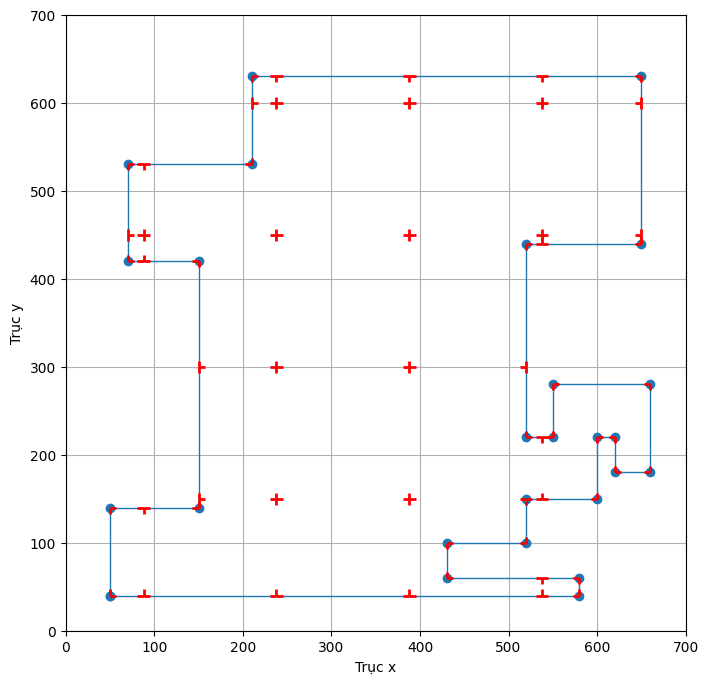

In [90]:
khuon_x = np.array(positions)[:,0]
khuon_y = np.array(positions)[:,1]

plt.subplots(figsize=(8,8))
arr_edges = []

plt.plot(khuon_x, khuon_y, marker='o', lw=1, label='Đoạn thẳng 1')

for c in crossroads:
    if c:
        point = c.point
        lw = 2
        length = 7
        color = 'red'
        if c.TOP:
            plt.vlines(point[0],point[1], point[1]-length, color=color, lw=lw)
        if c.RIGHT:
            plt.hlines(point[1],point[0], point[0]+length, color=color, lw=lw)
        if c.BOTTOM:
            plt.vlines(point[0],point[1], point[1]+length, color=color, lw=lw)
        if c.LEFT:
            plt.hlines(point[1],point[0], point[0]-length, color=color, lw=lw)
        
# Đặt tên cho trục x và y
plt.xlabel('Trục x')
plt.ylabel('Trục y')

plt.axis([0, 700 , 0, 700])
# Hiển thị đồ thị
plt.grid(True)
# plt.legend()
plt.show()
